<a href="https://colab.research.google.com/github/somewhereovertherainbo/ML-Algortihms/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/nasywa-ibtisamah/Developing-kNN-Machine-Learning-Model-and-Analyzing-RMSE-and-R-square-for-Masked-and-Unmasked-Data/main/data/insurance_us.csv')

In [29]:
df.shape

(5000, 5)

In [30]:
 df.head(10)

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [31]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Family members', 'Insurance benefits'], dtype='object')

In [32]:
df.dtypes

Gender                  int64
Age                   float64
Salary                float64
Family members          int64
Insurance benefits      int64
dtype: object

In [33]:
df.describe()

,Gender,Age,Salary,Family members,Insurance benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [34]:
df.isna().sum()

Gender                0
Age                   0
Salary                0
Family members        0
Insurance benefits    0
dtype: int64

In [35]:
df.loc[df.duplicated()]

,Gender,Age,Salary,Family members,Insurance benefits
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


In [36]:
df.drop_duplicates(inplace = True)

In [37]:
df.shape

(4847, 5)

In [38]:
df.reset_index(drop = True)

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4842,0,28.0,35700.0,2,0
4843,0,34.0,52400.0,1,0
4844,0,20.0,33900.0,2,0
4845,1,22.0,32700.0,3,0


In [39]:
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<Axes: title={'center': 'Age histogram'}, ylabel='Frequency'>

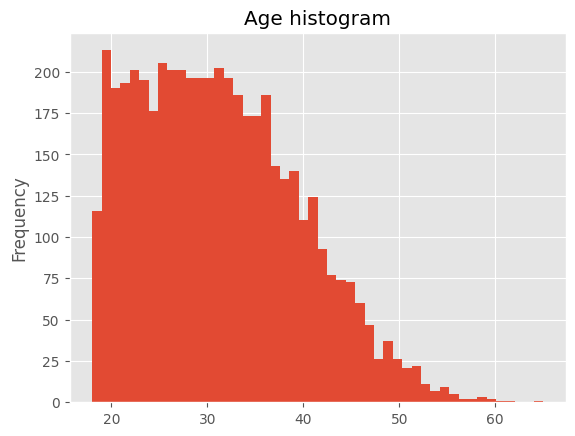

In [40]:
df['Age'].plot(kind = 'hist', bins = 48, title = 'Age histogram')

<Axes: title={'center': 'Age histogram'}, ylabel='Density'>

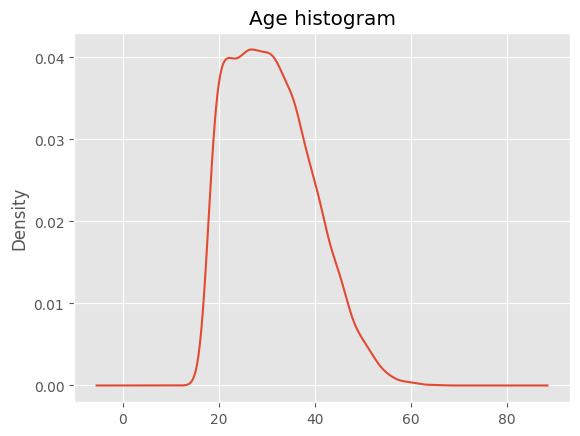

In [41]:
df['Age'].plot(kind = 'kde',  title = 'Age histogram')

<Axes: title={'center': 'Salary histogram'}, ylabel='Frequency'>

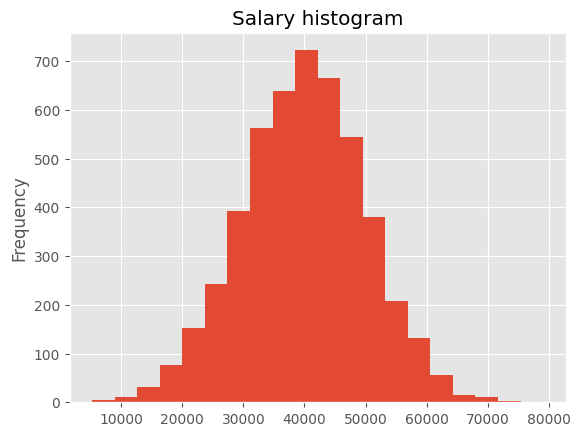

In [42]:
df['Salary'].plot(kind = 'hist', bins = 20, title = 'Salary histogram')

<Axes: title={'center': 'Salary histogram'}, ylabel='Density'>

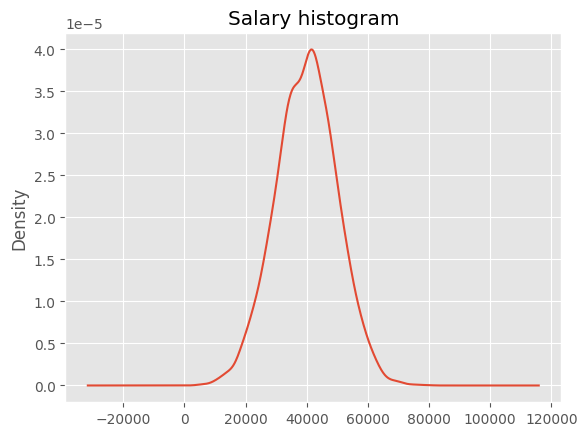

In [43]:
df['Salary'].plot(kind = 'kde', title = 'Salary histogram')

<Axes: title={'center': 'Family members histogram'}, ylabel='Frequency'>

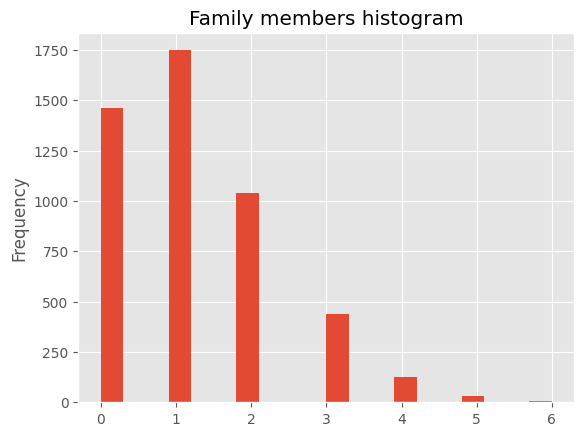

In [44]:
df['Family members'].plot(kind = 'hist', bins = 20, title = 'Family members histogram')

<Axes: xlabel='Age', ylabel='Salary'>

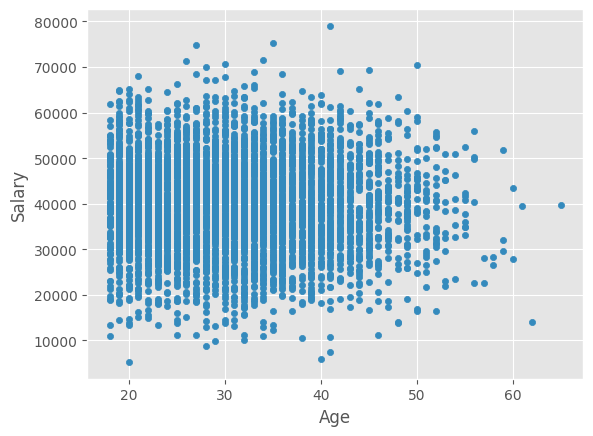

In [45]:
df.plot(kind = 'scatter',
        x = 'Age',
        y = 'Salary')

<Axes: xlabel='Salary', ylabel='Family members'>

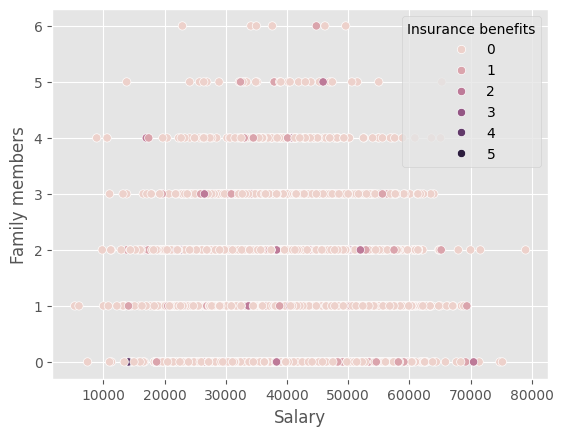

In [46]:
sns.scatterplot(data = df, x = 'Salary', y= 'Family members', hue = 'Insurance benefits')

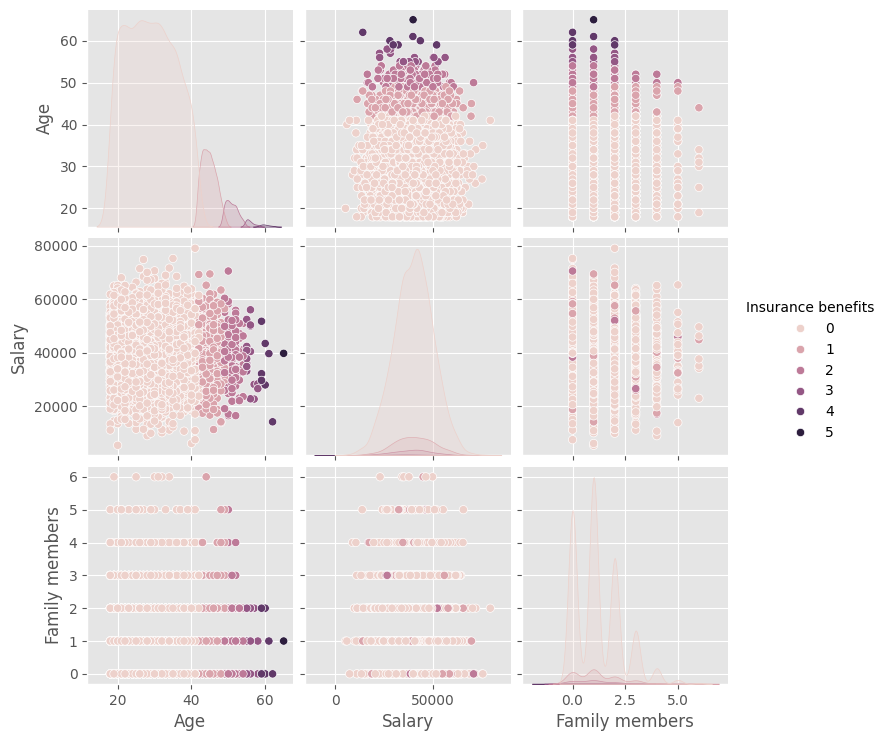

In [47]:
sns.pairplot(df, vars = ['Age', 'Salary', 'Family members'], hue = 'Insurance benefits')
plt.show()

In [48]:
df_corr = df[['Insurance benefits','Age', 'Salary', 'Family members']].corr()
df_corr

,Insurance benefits,Age,Salary,Family members
Insurance benefits,1.000000,0.654964,-0.013123,-0.039303
Age,0.654964,1.000000,-0.017386,-0.009064
Salary,-0.013123,-0.017386,1.000000,-0.031687
Family members,-0.039303,-0.009064,-0.031687,1.000000


<Axes: >

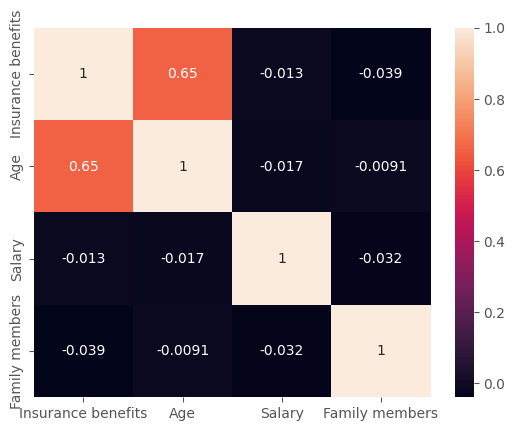

In [49]:
sns.heatmap(df_corr, annot = True)

In [71]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'Salary', 'Family members']], df['Insurance benefits'] , test_size=0.2, random_state=42)

In [52]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
(neigh.predict(X_test) == y_test).sum()/len(y_test)

0.9092783505154639

In [54]:
scaler = StandardScaler()
s_df = scaler.fit(df[['Age', 'Salary', 'Family members']])
s_df = s_df.transform(df[['Age', 'Salary', 'Family members']])

In [55]:
s_df.shape

(4847, 3)

In [56]:
SX_train, SX_test, sy_train, sy_test = train_test_split(s_df, df['Insurance benefits'] , test_size=0.2, random_state=42)

In [57]:
SX_train.shape

(3877, 3)

In [58]:
sy_train

433     0
4206    0
290     0
2644    0
4251    0
       ..
4563    0
467     0
3166    0
3880    0
865     0
Name: Insurance benefits, Length: 3877, dtype: int64

In [59]:
neigh1 = KNeighborsClassifier(n_neighbors=3)
neigh1.fit(SX_train, sy_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
(neigh1.predict(SX_test) == sy_test).sum()/len(sy_test)

0.9835051546391752

In [61]:
AX_train, AX_test, ay_train, ay_test = train_test_split(s_df[:,0], df['Insurance benefits'] , test_size=0.2, random_state=42)

In [66]:
AX_train = AX_train.reshape(-1,1)
AX_test = AX_test.reshape(-1,1)

In [69]:
neigh2 = KNeighborsClassifier(n_neighbors=2)
neigh2.fit(AX_train, ay_train)

KNeighborsClassifier(n_neighbors=2)

In [70]:
(neigh2.predict(AX_test) == ay_test).sum()/len(ay_test)

0.98659793814433

In [98]:
reg = LinearRegression().fit(SX_train, sy_train)

In [99]:
reg.score(SX_train, sy_train)

0.42734536073162976

In [100]:
reg.coef_, reg.intercept_

(array([ 0.30301629,  0.00258776, -0.01671381]), 0.14911742140890055)

In [101]:
reg.predict(SX_test[:20,:]), sy_test.iloc[:20]

(array([-0.26344645,  0.05165199,  0.09521921,  0.53275138,  0.15366863,
         0.21258517, -0.25479864,  0.32870665,  0.48642198,  0.55689391,
         0.01070062, -0.22161276,  0.00776822, -0.1127389 , -0.03842   ,
        -0.181031  ,  0.04918669, -0.25726394,  0.24426592,  0.42244395]),
 3991    0
 1706    0
 1052    0
 4959    1
 1554    0
 1042    0
 2138    0
 4392    0
 4143    0
 3667    1
 3324    0
 1782    0
 2809    0
 3488    0
 3272    0
 473     0
 1649    0
 1831    0
 493     0
 4753    0
 Name: Insurance benefits, dtype: int64)